# Statistics for Data Science - Project
## How "the Greatest Country in the World" Suffered So Much with the COVID-19 Pandemic

**Author:** Rui Monteiro, R20170796 <br>

**MSc:** Data Science and Advanced Analytics - Nova IMS <br>
**Course:** Statistics for Data Science <br>
2020/2021

## Introduction
The main goal of this project is to understand what led the United States of America (USA), frequently called "the Greatest Country in the World", to get a lot of attention for the worst reasons: it was almost always one of the most affected countries by the COVID-19 pandemic, both in terms of cases and deaths per 1 million citizens due to the disease. 

In order to understand how that happened, we developed a state-by-state analysis with Demographic, Economic, Political and Coronavirus-related variables. 

Deepro et al. (2021) suggested socio-economic variables are relevant to understand the number of COVID-19 cases, as expected. Still, we also decided to add a political variable: the percentage of votes in the Republicans (Donald Trump's Party) on the 2020 Presidential Election. We did that because the implemented Coronavirus restrictions became very controversial, which led Republicans (generally more conservative people) to reject the usage of masks or disrespect the lockdowns, while some even believed the pandemic was a hoax. 

On total, we began this analysis with 15 features, using the number of COVID-19 deaths per 1 million people as the dependent variable. Furthermore, we used several algorithms, such as the Linear Regression, Decision Tree, Clustering Techniques, and also some Statistical hypothesis tests, including the Shapiro-Wilk, One-way ANOVA and Welch’s t-tests.


## Setup Environment
To run this Notebook without issues, the user can fork and clone our **GitHub repository** available at https://github.com/rfmmonteiro99/SfDS-Project-Final.

Furthermore, the user needs an Anaconda environment with all the used libraries. A yml file is provided on our GitHub repository (link above) for that purpose. The user can **create the environment** with the sfds.yml file, by following these steps:
1. Put the yml file on a folder or even on the Desktop
2. Open Anaconda Navigator
3. Go to "Environments"
4. Click on "Import"
5. Name the new environment on "Name", and find the path to your file on "Specification File" (you may need to specify you want to search for txt files on the "Import Environment" box)
6. Click on "Import" so that Anaconda starts loading all the packages
7. Finally, navigate to the new environment on "Home" and launch Jupyter Notebook

## 1. Importing and Assessing Data

In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
from math import ceil

# Linear Regression:
import statsmodels.api as sm

# Decision Tree:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus

# Pre-processing:
import sklearn.preprocessing as prep

# Clustering:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.base import clone
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# t-SNE:
from sklearn.manifold import TSNE

# Statistical hypothesis testing:
from scipy.stats import shapiro, f_oneway, ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('data_covid_usa.xlsx', 'data', engine='openpyxl')

data.head()

,state,state_code,tot_cases_1M_pop,deaths_1M_pop,tests_1M_pop,pc_republican_votes,pop_size,pop_density,senior_pop,poverty_rate,uninsured,hospital_bed,icu_bed,nurses,medical_doctors,unemp_rate_oct_2020
0,Alabama,AL,86480,1248,434726,0.620,4903185,36.114704,17.4,15.5,9.7,18611,1637,85746,43429,5.7
1,Alaska,AK,68960,312,1928466,0.528,731545,0.424493,12.4,10.1,12.2,1832,193,15487,18418,5.9
2,Arizona,AZ,93324,1548,498823,0.491,7278717,24.654061,18.0,13.5,11.3,18388,1882,93928,84130,7.9
3,Arkansas,AR,90219,1439,861023,0.624,3017804,21.910696,17.4,16.2,9.1,12473,914,42487,47343,6.2
4,California,CA,76535,854,978324,0.343,39512223,93.196459,14.8,11.8,7.7,80893,8652,444964,588052,9.0


In [3]:
# Get a copy of the original dataset
data_original = data.copy()

In [4]:
# Dimension of the dataset (it has 51 rows because it includes the 50 States + the deferal District Of Columbia)
data.shape

(51, 16)

In [5]:
# Data types of the variables and columns - All data types are already correct!
data.dtypes

state                   object
state_code              object
tot_cases_1M_pop         int64
deaths_1M_pop            int64
tests_1M_pop             int64
pc_republican_votes    float64
pop_size                 int64
pop_density            float64
senior_pop             float64
poverty_rate           float64
uninsured              float64
hospital_bed             int64
icu_bed                  int64
nurses                   int64
medical_doctors          int64
unemp_rate_oct_2020    float64
dtype: object

In [6]:
# Summary Statistics of our variables
data.describe(include='all').T.drop(columns=['unique', 'top', 'freq'])

,count,mean,std,min,25%,50%,75%,max
state,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_code,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tot_cases_1M_pop,51,73769.4,22733.9,16378,64435,76535,87542.5,125887
deaths_1M_pop,51,1155.14,500.485,227,867,1130,1455,2307
tests_1M_pop,51,877925,385210,382302,615610,825459,1.00071e+06,2.11665e+06
pc_republican_votes,51,0.492039,0.119807,0.054,0.4095,0.492,0.578,0.699
pop_size,51,6.43607e+06,7.36066e+06,578759,1.78961e+06,4.46767e+06,7.44680e+06,3.95122e+07
pop_density,51,142.838,554.821,0.424493,18.9567,36.1147,80.763,3987.28
senior_pop,51,16.8941,2.02242,11.4,16.1,16.9,17.85,21.3
poverty_rate,51,12.1706,2.67801,7.3,10.1,11.8,13.5,19.6


In [7]:
# Info on the USA COVID-19 dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   state_code           51 non-null     object 
 2   tot_cases_1M_pop     51 non-null     int64  
 3   deaths_1M_pop        51 non-null     int64  
 4   tests_1M_pop         51 non-null     int64  
 5   pc_republican_votes  51 non-null     float64
 6   pop_size             51 non-null     int64  
 7   pop_density          51 non-null     float64
 8   senior_pop           51 non-null     float64
 9   poverty_rate         51 non-null     float64
 10  uninsured            51 non-null     float64
 11  hospital_bed         51 non-null     int64  
 12  icu_bed              51 non-null     int64  
 13  nurses               51 non-null     int64  
 14  medical_doctors      51 non-null     int64  
 15  unemp_rate_oct_2020  51 non-null     float

In [8]:
# Check duplicates
any(data.duplicated())

False

In [9]:
# Count of missing values
data.isna().sum()

state                  0
state_code             0
tot_cases_1M_pop       0
deaths_1M_pop          0
tests_1M_pop           0
pc_republican_votes    0
pop_size               0
pop_density            0
senior_pop             0
poverty_rate           0
uninsured              0
hospital_bed           0
icu_bed                0
nurses                 0
medical_doctors        0
unemp_rate_oct_2020    0
dtype: int64

## 2. Data Cleansing

In [10]:
# state: stays as index of the dataset
data.set_index('state', inplace=True)

# Drop the state codes from the main dataset
data.drop(columns='state_code', inplace=True)

In [11]:
# Update the variable pc_republican_votes to have the percentages in the range 0-100, like the other percentage columns
data['pc_republican_votes'] = data['pc_republican_votes'] * 100

In [12]:
data.head()

,tot_cases_1M_pop,deaths_1M_pop,tests_1M_pop,pc_republican_votes,pop_size,pop_density,senior_pop,poverty_rate,uninsured,hospital_bed,icu_bed,nurses,medical_doctors,unemp_rate_oct_2020
state,,,,,,,,,,,,,,
Alabama,86480,1248,434726,62.0,4903185,36.114704,17.4,15.5,9.7,18611,1637,85746,43429,5.7
Alaska,68960,312,1928466,52.8,731545,0.424493,12.4,10.1,12.2,1832,193,15487,18418,5.9
Arizona,93324,1548,498823,49.1,7278717,24.654061,18.0,13.5,11.3,18388,1882,93928,84130,7.9
Arkansas,90219,1439,861023,62.4,3017804,21.910696,17.4,16.2,9.1,12473,914,42487,47343,6.2
California,76535,854,978324,34.3,39512223,93.196459,14.8,11.8,7.7,80893,8652,444964,588052,9.0


## 3. Data Exploration

**Histograms:**

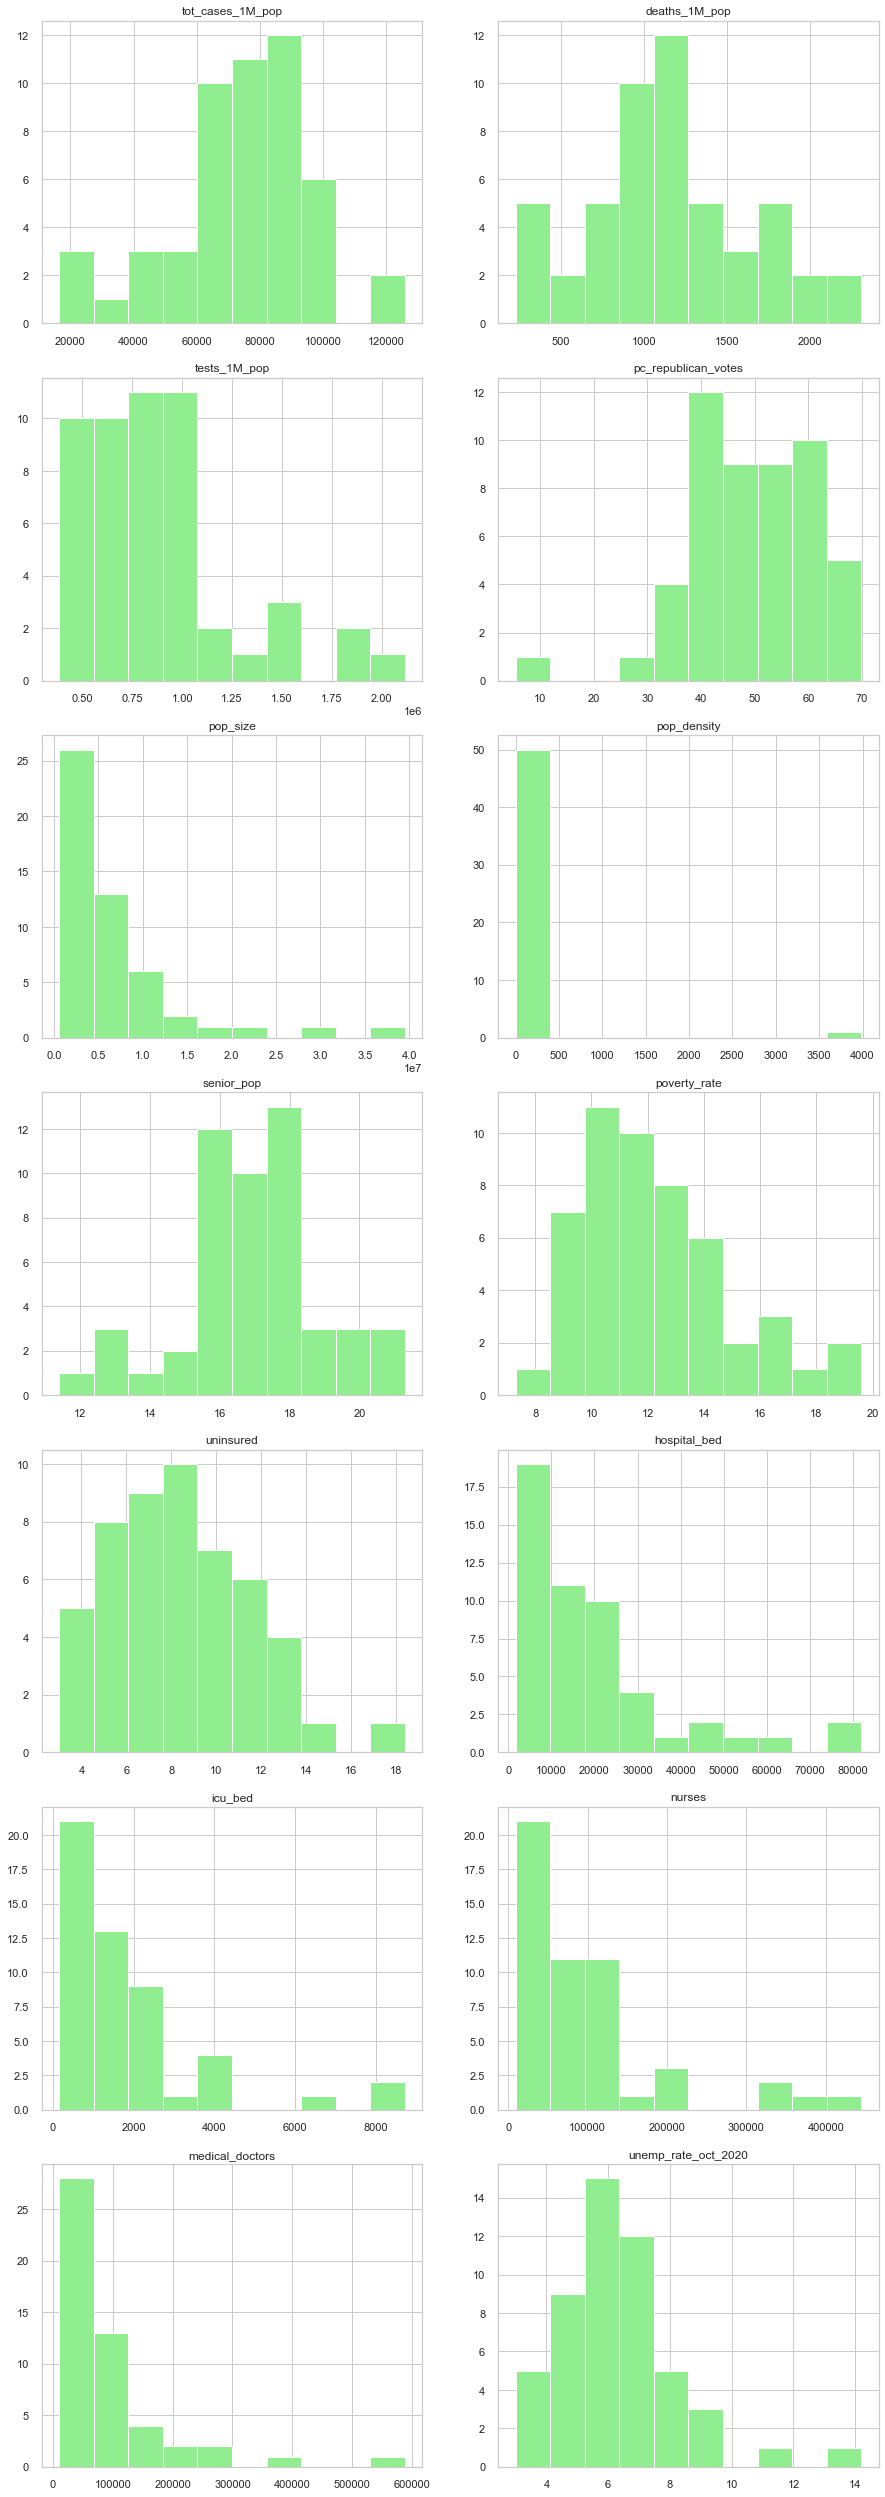

In [13]:
sns.set(style='whitegrid')

# Create individual axes 
fig, axes = plt.subplots(ceil(len(data.columns)/2), 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), data.columns):
    ax.hist(data[feat], color='lightgreen')
    ax.set_title(feat)
    
# Show
plt.show()

**Box plots:**

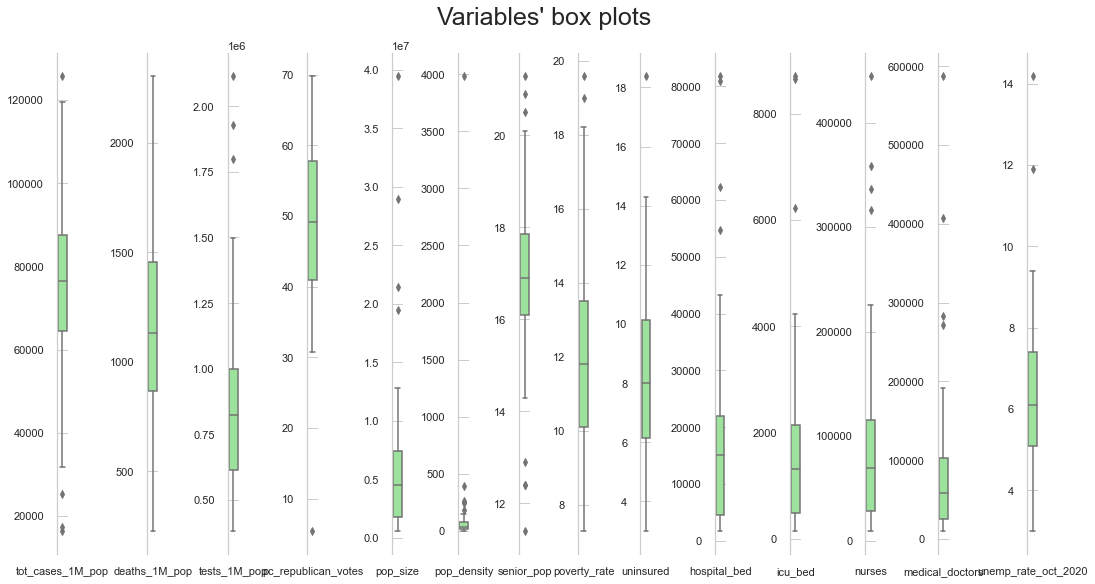

In [14]:
sns.set(style='whitegrid')

# Prepare dataframe layout
plot_data = data.reset_index().melt('state')
plot_features = data.reset_index().drop('state', 1).columns

# Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[:16]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[:16]):
    sns.boxplot(x='variable', y='value', data=plot_data.loc[plot_data['variable']==i[1]], ax=i[0], color='lightgreen')
    i[0].set_xlabel('')
    i[0].set_ylabel('')

# Finalize the plot
plt.suptitle("Variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()

**Correlation Matrix:**

In [15]:
def color_red_or_green(val):
    if val < -0.8:
        color = 'background-color: red'
    elif val > 0.8:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Checking correlations 
correlations = data.corr()
correlations.style.applymap(color_red_or_green)

,tot_cases_1M_pop,deaths_1M_pop,tests_1M_pop,pc_republican_votes,pop_size,pop_density,senior_pop,poverty_rate,uninsured,hospital_bed,icu_bed,nurses,medical_doctors,unemp_rate_oct_2020
tot_cases_1M_pop,1.000000,0.505705,-0.186077,0.588680,-0.025328,-0.173814,-0.287904,0.224733,0.340210,0.009383,0.032846,-0.035683,-0.077291,-0.241191
deaths_1M_pop,0.505705,1.000000,0.183464,0.016042,0.099679,0.088242,-0.004662,0.258918,-0.068165,0.166802,0.126211,0.189707,0.140115,0.136503
tests_1M_pop,-0.186077,0.183464,1.000000,-0.419208,-0.018240,0.271853,-0.092890,-0.097250,-0.321554,-0.045413,-0.055734,0.040333,0.090346,0.184607
pc_republican_votes,0.588680,0.016042,-0.419208,1.000000,-0.167969,-0.578933,0.078647,0.342898,0.534278,-0.091216,-0.077585,-0.190978,-0.258809,-0.347596
pop_size,-0.025328,0.099679,-0.018240,-0.167969,1.000000,-0.079432,-0.184784,0.058039,0.223989,0.969397,0.973460,0.967128,0.953345,0.231559
pop_density,-0.173814,0.088242,0.271853,-0.578933,-0.079432,1.000000,-0.302904,0.032521,-0.269354,-0.078759,-0.079811,-0.062235,-0.046380,0.164248
senior_pop,-0.287904,-0.004662,-0.092890,0.078647,-0.184784,-0.302904,1.000000,0.074118,-0.260958,-0.153646,-0.189553,-0.117437,-0.135142,-0.026842
poverty_rate,0.224733,0.258918,-0.097250,0.342898,0.058039,0.032521,0.074118,1.000000,0.379290,0.153149,0.146146,0.050305,0.013276,0.217448
uninsured,0.340210,-0.068165,-0.321554,0.534278,0.223989,-0.269354,-0.260958,0.379290,1.000000,0.265847,0.305299,0.121382,0.037709,-0.094775
hospital_bed,0.009383,0.166802,-0.045413,-0.091216,0.969397,-0.078759,-0.153646,0.153149,0.265847,1.000000,0.987609,0.974669,0.909343,0.223301


## 4. Outliers

Removing the Federal district of the United States, District of Columbia, due to a very extreme value of pop_density. This is possible to observe on the box-plots of the Data Visualization stage.

This State is going to be removed, because it could potentially bias results.

In [16]:
data = data[data['pop_density']<3950]

**Checking results:**

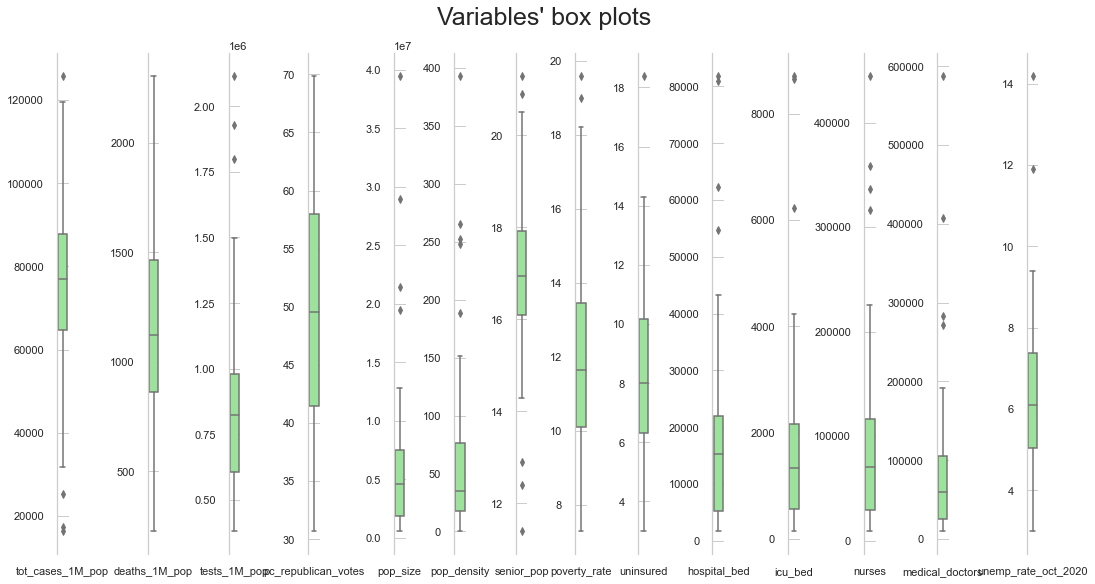

In [17]:
sns.set(style='whitegrid')

# Prepare dataframe layout
plot_data = data.reset_index().melt('state')
plot_features = data.reset_index().drop('state', 1).columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[:16]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[:16]):
    sns.boxplot(x='variable', y='value', data=plot_data.loc[plot_data['variable']==i[1]], ax=i[0], color='lightgreen')
    i[0].set_xlabel('')
    i[0].set_ylabel('')

# Finalize the plot
plt.suptitle("Variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()

## 5. Feature Engineering

Calculating the number of ICU beds (Intensive Care Unit) per 1 thousand citizens, on each state:

In [18]:
data['icu_bed_1T_pop'] = (data['icu_bed']*1000) / data['pop_size']
data['hospital_bed_1T_pop'] = (data['hospital_bed']*1000) / data['pop_size']

Calculating the number of health professionals (nurses and doctors) per 1 thousand citizens, on each state:

In [19]:
data['health_professionals'] = data['nurses'] + data['medical_doctors']
data['health_professionals_1T_pop'] = (data['health_professionals']*1000) / data['pop_size']

Drop the variables that were only needed to create new ones. We don't want to use hospital_bed, icu_bed, nurses, medical_doctors and health_professionals on any algorithm, because those are totals, and larger states will almost always have more hospital beds or medical staff (it's better to use variables per 1 million or 1 thousand citizens, that take the population of each state into account).

In [20]:
data.drop(columns=['pop_size', 'hospital_bed', 'icu_bed', 'nurses', 'medical_doctors', 'health_professionals'],\
          inplace=True)

## 6. Data Cleaning Validation

**Box plots:**

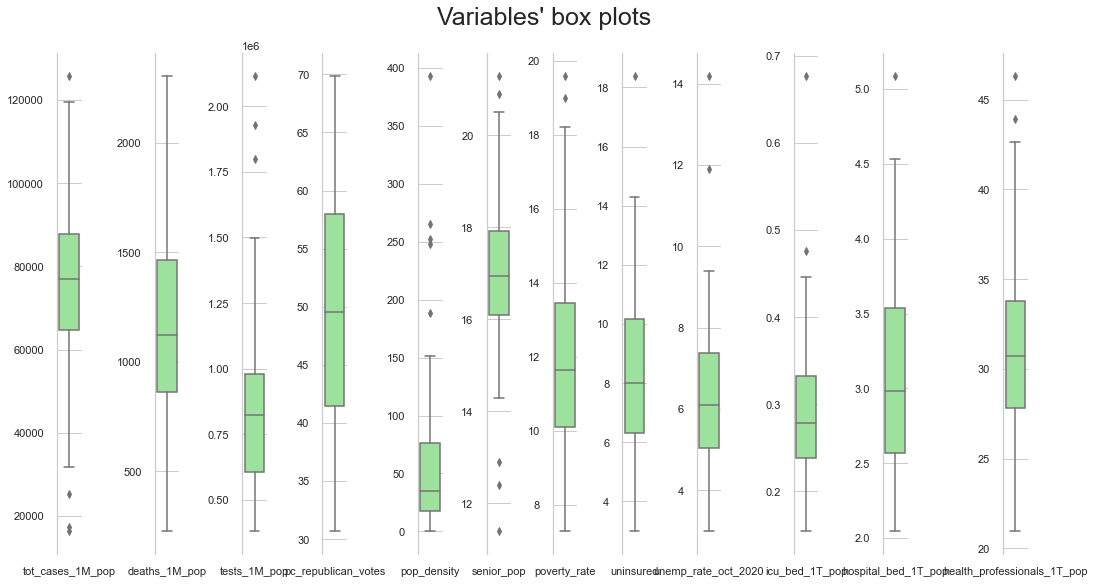

In [21]:
sns.set(style='whitegrid')

# Prepare dataframe layout
plot_data = data.reset_index().melt('state')
plot_features = data.reset_index().drop('state', 1).columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[:16]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[:16]):
    sns.boxplot(x='variable', y='value', data=plot_data.loc[plot_data['variable']==i[1]], ax=i[0], color='lightgreen')
    i[0].set_xlabel('')
    i[0].set_ylabel('')

# Finalize the plot
plt.suptitle("Variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()

**Correlation Matrix:**

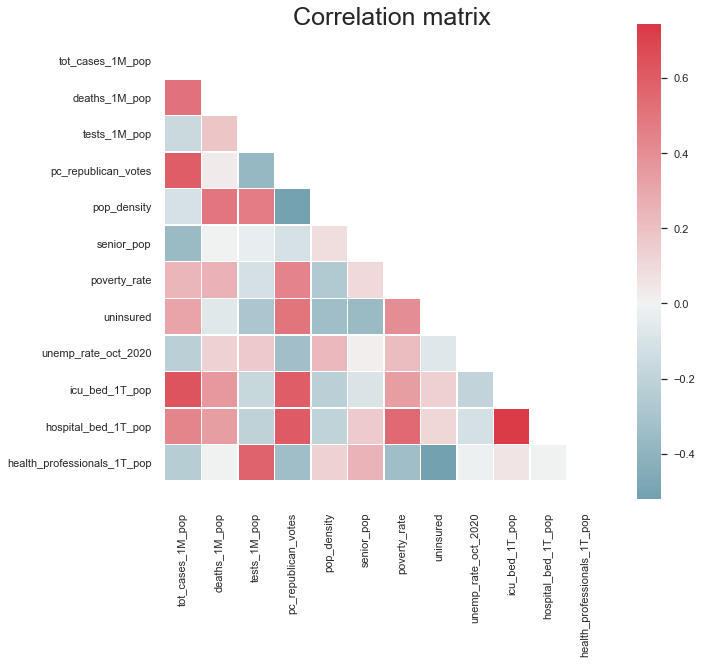

In [22]:
sns.set(style='white')

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Return a matplotlib colormap object.

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle('Correlation matrix', fontsize=25)
plt.yticks(rotation=0)

# Fixing a bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # Update the ylim(bottom, top) values
plt.show()

## 7. Feature Selection

Visualizing the Correlation Matrix, to check for **multicollinearity and redundancy** issues among our independent variables:

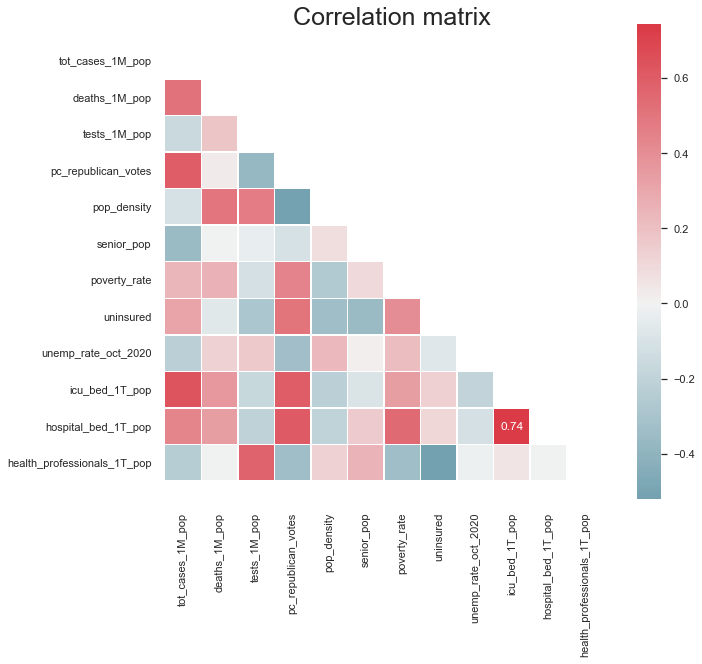

In [23]:
sns.set(style='white')

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = np.absolute(corr.values)>=0.70 # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((12,12),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle('Correlation matrix', fontsize=25)
plt.yticks(rotation=0)

# Fixing a bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # Update the ylim(bottom, top) values
plt.show()

The only strong relationship is between hospital_bed_1T_pop and icu_bed_1T_pop, with a Pearson's Correlation Coefficient of 0.74. These two variables are, in fact, redundant, because as the number of hospital beds per 1 thousand people increases, the number of ICU beds also increases, as expected.

For this reason, we will check which variable has the highest correlation with the dependent variable (deaths_1M_pop).

In [24]:
print('The correlation between hospital_bed_1T_pop and the dependent variable is:', 
      round(corr.loc['hospital_bed_1T_pop', 'deaths_1M_pop'], 2))

The correlation between hospital_bed_1T_pop and the dependent variable is: 0.34


In [25]:
print('The correlation between icu_bed_1T_pop and the dependent variable is:', 
      round(corr.loc['icu_bed_1T_pop', 'deaths_1M_pop'], 2))

The correlation between icu_bed_1T_pop and the dependent variable is: 0.36


The correlation is slightly higher between icu_bed_1T_pop and the dependent variable. Also, the number of ICU beds is, in fact, important to judge the number of deaths due to Coronavirus, because generally those are the ones needed to save the lives of the people most affected by COVID-19.

Thus, we will remove hospital_bed_1T_pop.

In [26]:
data.drop(columns='hospital_bed_1T_pop', inplace=True)

## 8. Data Normalization

**Standardize** input data because we want every variable to have the same importance.

StandardScaler standardizes variables by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as: <br>
*z = (x - mean) / std_deviation*

In [27]:
scaler = prep.StandardScaler()
data_std = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

## 9. Separate Independent Variables from the Dependent

Define the deaths per 1 million people due to COVID-19 as the dependent variable:

In [28]:
dep_var = data_std['deaths_1M_pop']
indep_vars = data_std.drop(columns = 'deaths_1M_pop')

Also on the original dataset:

In [29]:
dep_var_orig = data['deaths_1M_pop']
indep_vars_orig = data.drop(columns = 'deaths_1M_pop')

## 10. Modelling

### 10.1. Linear Regression

An Ordinary Least Squares regression (OLS) will be performed, where all the independent variables are a function of the deaths per 1 million people due to COVID-19: <br>
*deaths_1M_pop ~ Independent variables*

*Note:* The first regression is with the data that is NOT normalized (may be useful to interpret the coefficients), while the second one is with the normalized dataset (thus, with standardized coefficients).

In [30]:
# The sm.add_constant() function is used to add an intercept to the regression
ols_reg = sm.OLS(dep_var_orig, sm.add_constant(indep_vars_orig))

result = ols_reg.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          deaths_1M_pop   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     10.06
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           4.47e-08
Time:                        18:44:01   Log-Likelihood:                -349.83
No. Observations:                  50   AIC:                             721.7
Df Residuals:                      39   BIC:                             742.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [31]:
ols_reg_std = sm.OLS(dep_var, sm.add_constant(indep_vars)) # Normalized data!

result_std = ols_reg_std.fit()

print(result_std.summary())

                            OLS Regression Results                            
Dep. Variable:          deaths_1M_pop   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     10.06
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           4.47e-08
Time:                        18:44:04   Log-Likelihood:                -39.062
No. Observations:                  50   AIC:                             100.1
Df Residuals:                      39   BIC:                             121.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [32]:
print('R²:', round(result_std.rsquared, 3))
print('Adjusted R²:', round(result_std.rsquared_adj, 3))

R²: 0.721
Adjusted R²: 0.649


### 10.2. Decision Tree

At this stage, a Decision Tree will be used in order to understand and interpret the most important factors regarding deaths due to COVID-19. This algorithm is one of the easiest (and most useful) to reach this goal.

For this reason, we are not interested in handling overfitting, and we want the best accuracy possible, as this model will not be used to do predictions on Validation or Test datasets.

Also, we used the continuous dependent variable to create two classes: '0' for states below or equal to the median number of COVID-19 deaths per 1 million people, and '1' otherwise. Thus, this was turned into a classification problem.

*Note:* Decision trees do not require feature scaling to be performed.

In [33]:
dep_var_class = dep_var_orig.reset_index()

# '0' if the state has less than the median in terms of deaths per 1 million people or the same, '1' otherwise
dep_var_class['class'] = 0
dep_var_class.loc[dep_var_class['deaths_1M_pop'] > dep_var_class['deaths_1M_pop'].median(), 'class'] = 1

# Final Pandas Series to be used as the dependent variable on the Decision Tree
dep_var_class = dep_var_class.set_index('state')['class']

**Python Function:**

In [34]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=indep_vars_orig.columns,  
                               class_names=["Below Median", "Above Median"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"10,10"')
    return graphviz.Source(pydot_graph.to_string())

**Decision Tree Classifier:**

In [35]:
# Depth of 5 because 6 (maximum) would give a very subtle (and not very relevant) increase in accuracy
decision_tree = DecisionTreeClassifier(max_depth=5).fit(indep_vars_orig, dep_var_class)

In [36]:
print('Tree\'s Accuracy:', decision_tree.score(indep_vars_orig, dep_var_class)*100, '%')

Tree's Accuracy: 96.0 %


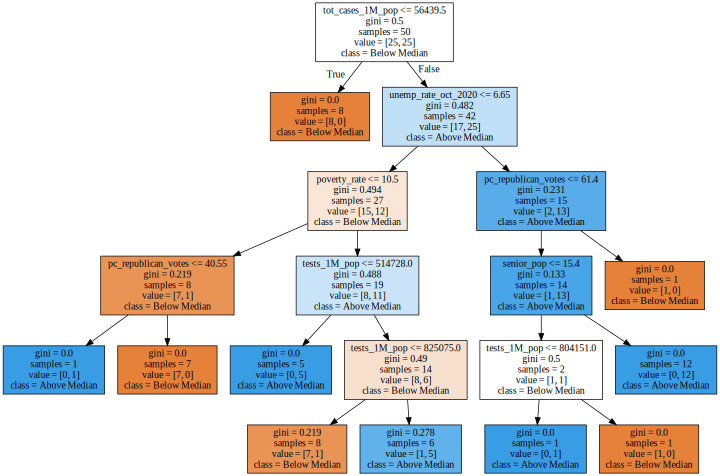

In [37]:
plot_tree(decision_tree)

### 10.3. Hierarchical & K-means Clustering

**Python Functions:**

In [38]:
def get_r2_scores(df, clusterer, min_k=2, max_k=11):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

In [39]:
def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

In [40]:
def get_ss(df):
    """
    Computes the sum of squares for all variables given a dataset.
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss # Return sum of sum of squares of each df variable

In [41]:
def r_sq_plot(df):
    r2_scores = {}

    hierarchical = AgglomerativeClustering(affinity='euclidean')
    
    # Doing hierarchical on top of the K-means
    for linkage in ['complete', 'average', 'single', 'ward']:
        r2_scores[linkage] = get_r2_scores(
            df, hierarchical.set_params(linkage=linkage)
        )

    # Visualizing the R² scores for each cluster solution
    pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

    plt.title("R² plot for various clustering methods\n", fontsize=21)
    plt.legend(title="Cluster methods", title_fontsize=11)
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R² metric", fontsize=13)
    plt.show()

In [42]:
def kelbowplots(clus, data):
    """
    This function produces the k-elbow plot for a given clustering estimator according to 2 quality measures: 
    Silhouette and Calinski Harabasz.
    """
    sns.set()
    fig, axes = plt.subplots(1, 2, figsize=(15,6))

    # Plot the data
    metrics = ["silhouette", "calinski_harabasz"]
    ylabels = ["Silhouette", "Calinski and Harabasz"]
    titles = ["Silhouette measure plot", "Calinski and Harabasz measure plot"]
    for ax, m, ylabel, title in zip(axes.flatten(), metrics, ylabels, titles):
        # KElbowVisualizer produces the elbow plot for several quality measures
        KElbowVisualizer(clus, metric=m, timings=False, locate_elbow=True, ax=ax).fit(data)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_xlabel("Number of clusters", fontsize=12)
        ax.set_title(title, fontsize=12)

    # Top title
    plt.suptitle("K-Elbow Plots", fontsize=20)

    plt.show()

In [43]:
def silhouette_analysis(df, estimator, shape, figsize, max_nclus, min_nclus=2, dist="euclidean"):
    """
    This function builds the Silhouette plots for a given range of cluster solutions. This is useful to find out the 
    most appropriate number of clusters.
    """
    range_n_clusters = list(range(min_nclus, max_nclus+1))
    
    sns.set()
    fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=figsize)
    
    if len(range_n_clusters)==1: # In case we want to seed the silhouette for just one cluster solution
        axes_final = [axes]
    else:
        axes_final = axes.flatten()
        
    n = []
    avgs = []
    for ax, n_clusters in zip(axes_final, range_n_clusters):
        # Get parameter that defines number of clusters
        if "n_clusters" in estimator.get_params():
            param = "n_clusters"

        else:
            print("Estimator has no parameter to define number of clusters")
            return None # To stop if this happens
        
        # Get the cluster labels by applying the algorithm
        clustering = estimator.set_params(**{param:n_clusters}) # Set the parameters of the estimator
        labels = clustering.fit_predict(df)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        n.append(n_clusters)
        silhouette_avg = silhouette_score(df, labels, metric=dist)
        avgs.append(silhouette_avg)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, labels, metric=dist)
        
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()

            # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Filling the silhouette
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        
        ax.set_title("{} Clusters".format(n_clusters), fontsize=13)
        
        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        
        ax.set_yticks([]) # Clear the y axis labels / ticks
        ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette") 
        # The vertical line for average silhouette score of all the values
    
    plt.subplots_adjust(hspace=0.35)
    plt.suptitle(("Clustering Silhouette Plots"), fontsize=23)
    plt.show()
    
    for i in range(len(n)):
        print(f"For n_clusters = {n[i]}, the average silhouette_score is: {round(avgs[i], 4)}")

In [44]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

**K-means Clustering:**

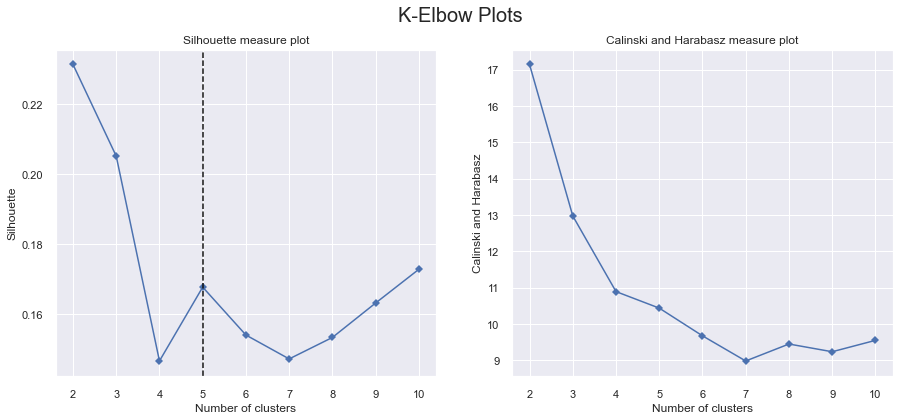

In [45]:
# Instantiate a K-Means model
clus_estim = KMeans(random_state=42) # Default is already 'k-means++' on init, and 10 on n_init, which is good

# K-elbow plots
kelbowplots(clus_estim, indep_vars)

The measures represented above help us assess how many clusters we should retain. Here, we are using 2 quality measures: Silhouette score, and Calisnki and Harabasz score. These represent the mean ratio of intra-cluster and nearest-cluster distance, and ratio of within to between cluster dispersion, respectively, and their values should be high.

In this case, we think the best value is 3 clusters, because after that, we can clearly see a steep drop in quality and performance, especially on the Silhouette measure.

We will complement this analysis with the visualization of the Silhouette Plots, to get a better understanding of the quality of this cluster analysis with 2, 3, 4 or 5 clusters.

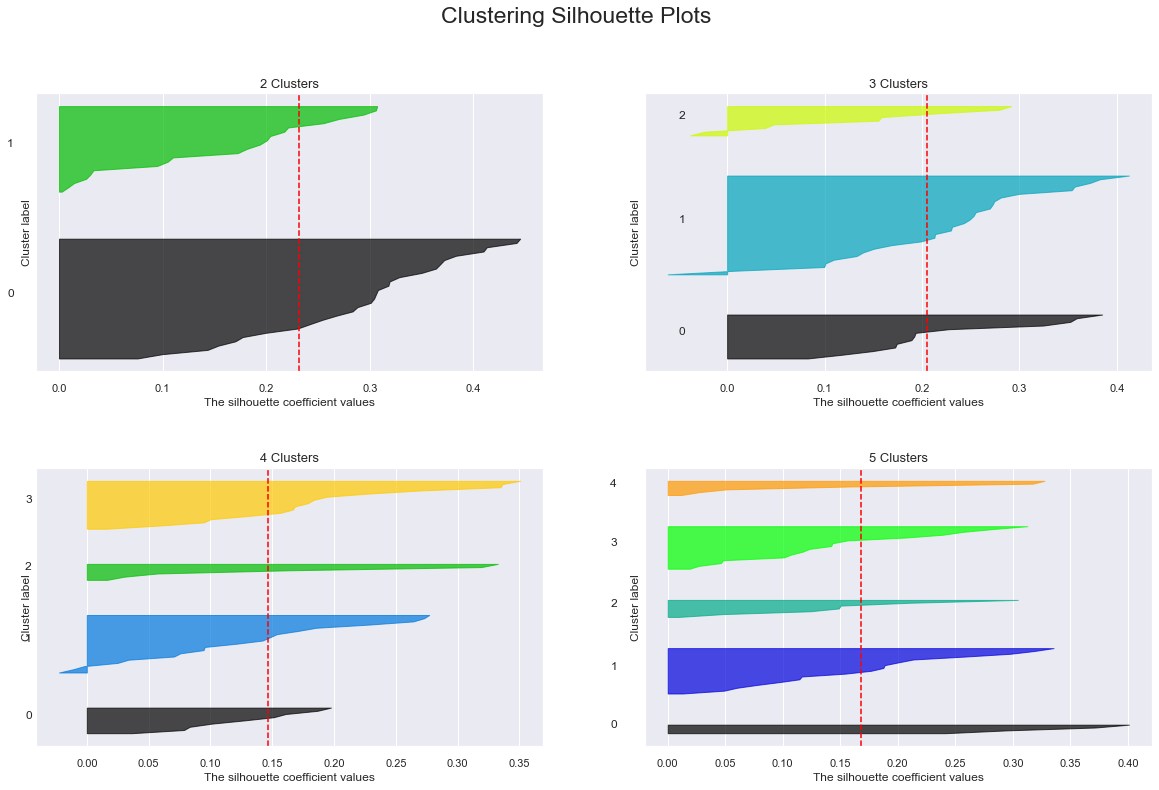

For n_clusters = 2, the average silhouette_score is: 0.2312
For n_clusters = 3, the average silhouette_score is: 0.2051
For n_clusters = 4, the average silhouette_score is: 0.1466
For n_clusters = 5, the average silhouette_score is: 0.1677


In [46]:
kmeans = KMeans(random_state=42)
silhouette_analysis(indep_vars, kmeans, (2,2), (20,12), max_nclus=6)

"Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]." (from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

It is also important to note that negative values on the scores indicate that those samples might have been assigned to the wrong cluster.

From these plots, we believe the 3-cluster solution is the most appropriate, as it has a good Silhouette score, Calinski and Harabasz score, and it also produces good results on the Silhouette plot.

In [47]:
# Perform k-means
model_km = KMeans(3, random_state=42)
model_km.fit(indep_vars)
clust_labels_km = model_km.predict(indep_vars)
cent_km = model_km.cluster_centers_

In [48]:
# Appending the cluster labels to a new dataframe
indep_vars_kmeans_final = indep_vars.copy()
indep_vars_kmeans_final['k_means_labels'] = clust_labels_km

**K-means Cluster visualization using t-distributed stochastic neighbor embedding (t-SNE):**

In [49]:
# Implementing t-SNE
two_dim = TSNE(random_state=42).fit_transform(indep_vars_kmeans_final.drop(columns='k_means_labels'))

two_dim_final = pd.DataFrame(two_dim, index=indep_vars_kmeans_final.index)\
                .merge(indep_vars_kmeans_final['k_means_labels'], on='state')

two_dim_final.columns = ['x', 'y', 'K-means labels']

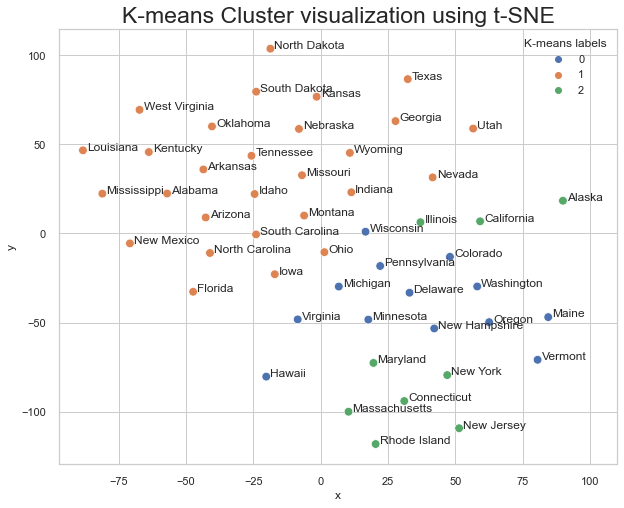

In [50]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 8))

# t-SNE visualization
sns.scatterplot(data=two_dim_final, x='x', y='y', hue='K-means labels', s=75, palette='deep')

# Layout
plt.title('K-means Cluster visualization using t-SNE', size=23)
plt.xlim(None, 110)

# Label data points on the scatter plot
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+1.5, point['y'], str(point['val']))

two_dim_labels = two_dim_final.reset_index()
label_point(two_dim_labels.x, two_dim_labels.y, two_dim_labels.state, plt.gca())

# # Save it as a png file
# plt.savefig('kmeans_cluster_visualization_using_t_sne.png')

plt.show()

**Hierarchical Clustering:**

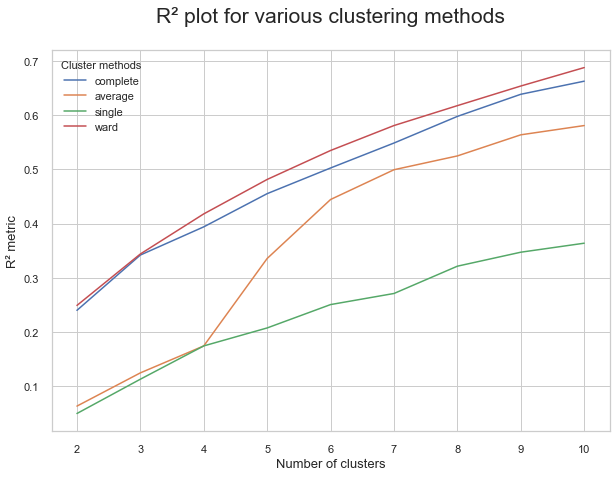

In [51]:
# R-square Plot
r_sq_plot(indep_vars)

From the plot above, it is possible to compare the performance of the various Hierarchical Clustering linkages (Ward, complete, average and single) according to R-square. In this case, it can be seen that the Ward's method outperforms the others, and therefore should be used for linking the clusters.

With this, we were able to choose the most adequate method, and it looks like there is a very subtle elbow at 3 clusters, which leads us to believe 3 is a good number of clusters. We will also produce some visualizations to further help us.

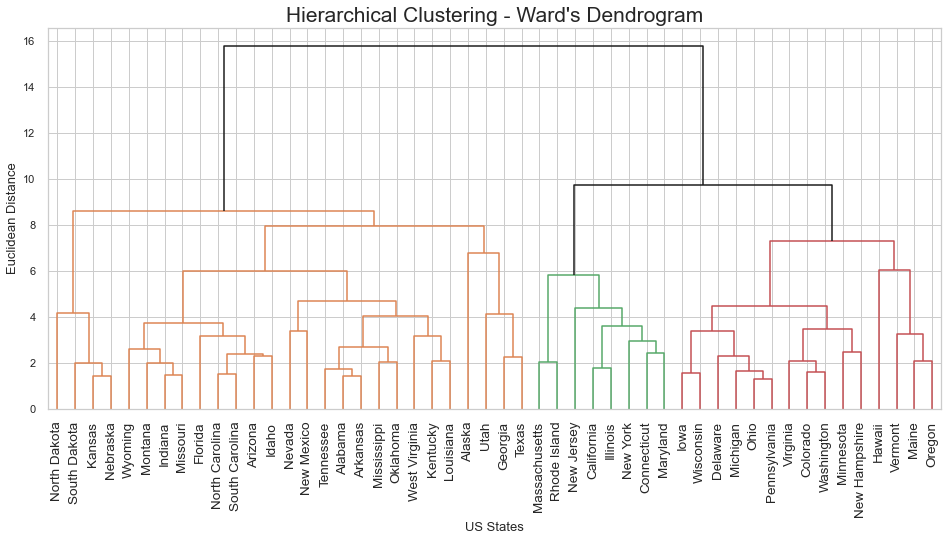

In [52]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(indep_vars, method="ward")

# Plot the corresponding Dendrogram
sns.set(style='whitegrid')
fig = plt.figure(figsize=(16,7))

y_threshold = 9
dendrogram(linkage_matrix, labels=indep_vars.index, color_threshold=y_threshold, above_threshold_color='k')

# plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('US States', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.gca().tick_params(axis='x', which='major', labelsize=13.5)

plt.show()

Here we can visualize the clustering through the Dendrogram, in which we can define a cut-off at the first big jump of Euclidean distance between merged clusters.

With the cut-off defined above, we would retain 3 clusters.

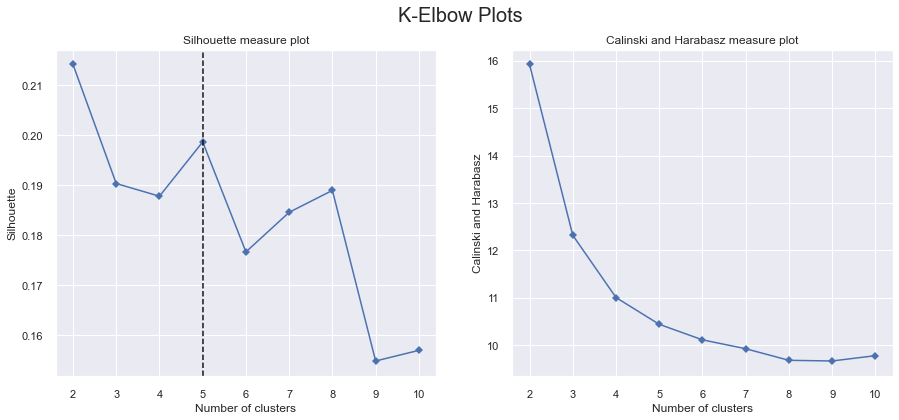

In [53]:
# Hierarchical clustering with linkage according to the plot above
hc = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(hc, indep_vars)

By analyzing the elbow plots, we get 2 different visualizations. The Silhouette elbow plot seems to have good results in the range of 3-5 clusters, although the Calinski and Harabasz measure plot seems to have an elbow on 3 or even 4.

Finally, we will complete this analysis with the Clustering Silhouette plots.

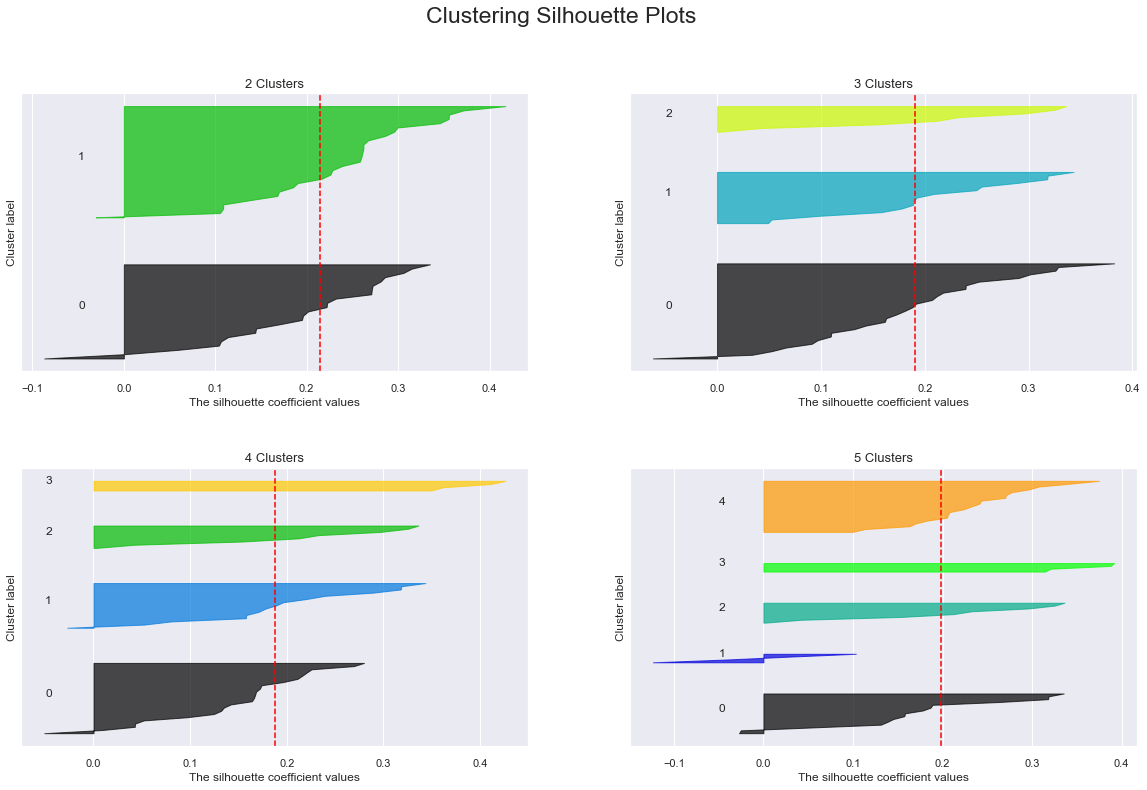

For n_clusters = 2, the average silhouette_score is: 0.2141
For n_clusters = 3, the average silhouette_score is: 0.1904
For n_clusters = 4, the average silhouette_score is: 0.1878
For n_clusters = 5, the average silhouette_score is: 0.1987


In [54]:
hc_estimator = AgglomerativeClustering(linkage='ward')
silhouette_analysis(indep_vars, hc_estimator, (2,2), (20, 12), 5)

According to these plots, and trying to mix the results from all visualizations and measures, we will keep 3 clusters, as this solution seems to have good quality measures and well-defined clusters.

In [55]:
# Perform the final HC
model_hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
clust_labels_hc = model_hc.fit_predict(indep_vars)

In [56]:
# Appending the cluster labels to a new dataframe
indep_vars_hc_final = indep_vars.copy()
indep_vars_hc_final['hc_labels'] = clust_labels_hc

## 11. Conclusion

If we compare the K-means cluster solution with the Hierarchical Clustering one (both were done with the number of clusters equal to 3), K-means seems to have slightly better quality metrics, when analyzing the Silhouette & Calinski and Harabasz scores, various Silhouette Plots, among others. Also, these clusters have an interesting and useful interpretation. 

Thus, we will interpret and take conclusions from this 3-cluster solution, performed with the K-means algorithm.

*Note:* All the variables are normalized.

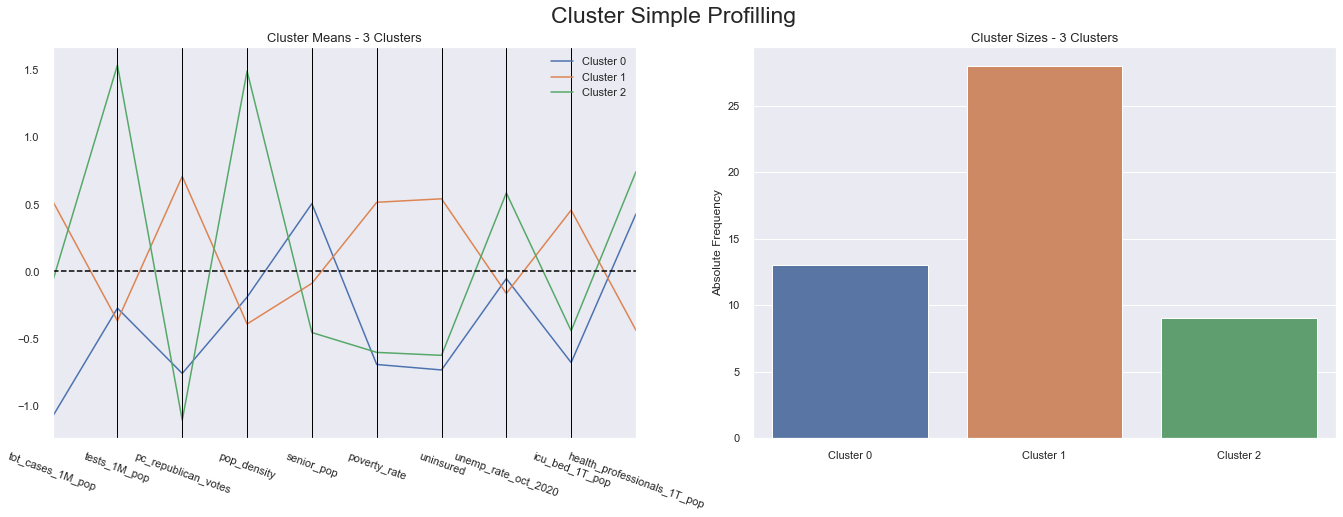

In [57]:
# K-means Cluster Profilling
cluster_profiles(indep_vars_kmeans_final, ['k_means_labels'], (23, 7))

In [58]:
# Exact number of states on each Cluster
indep_vars_kmeans_final['k_means_labels'].value_counts()

1    28
0    13
2     9
Name: k_means_labels, dtype: int64

In [59]:
# Average deaths (dependent variable!) on each Cluster
indep_vars_kmeans_final.merge(dep_var, on='state').groupby('k_means_labels')['deaths_1M_pop'].mean()

k_means_labels
0   -0.745302
1    0.086651
2    0.806966
Name: deaths_1M_pop, dtype: float64

**Cluster Interpretations:**

*Cluster 0 - States that were least affected by the virus:* This cluster is composed by 13 states, mainly on the North-east (e.g. Maine, New Hampshire, Vermont) and Midwest USA (e.g. Michigan, Minnesota, Wisconsin). These were the states with the least total cases of COVID-19 per 1 million people (1 standard deviation below the mean), lowest poverty rate, lowest percentage of people without a health insurance, and smallest number of ICU beds per 1 thousand people. On the other hand, they have the highest percentage of senior population. When compared to the other 2 clusters, they also have a low number of COVID-19 tests done, low percentage of votes in the Republicans (Donald Trump's Party) on the 2020 Presidential Election, low population density and, finally, low unemployment rate. These were the ones with the least COVID-19 deaths per 1 million people, on average (the deaths are almost 1 standard deviation below the mean).

*Cluster 1 - Red States, with more poverty and weaker health infrastructures:* This cluster is the largest one, with 28 states, mainly in the South and Midwest (e.g. in the South: Florida, Texas, Louisiana, Alabama, Mississippi & in the Midwest: Kansas, North and South Dakota, Kentucky, Iowa). This cluster holds the highest number of cases per 1 million people, highest percentage of votes in the Republican Party on the 2020 Presidential Election (so, mainly Red states), highest poverty rate, highest percentage of people without a health insurance, but also the highest number of ICU beds per 1 thousand people. It also has the lowest number of tests per 1 million people, lowest population density, lowest unemployment rate, and lowest number of health professionals per 1 thousand people. These had an average number of deaths per 1 million people.

*Cluster 2 - Most densely populated States, and most affected by COVID-19:* This cluster is the smallest one, having only 9 states, mostly on the North-east, while many have a very high population density, like New Jersey, Rhode Island, Massachusetts, and Connecticut, when compared with the rest. They also have the highest number of COVID-19 tests (1.5 standard deviations above the mean), highest unemployment rate, and highest number of health professionals per 1 thousand people. This cluster has the lowest percentage of votes in the Republican Party on the 2020 Presidential Election (1 standard deviation below the mean), and lowest percentage of senior population. It also has a somewhat low poverty rate, low percentage of people without a health insurance, and low number of ICU beds per 1 thousand people. These were the most affected by the virus, as the deaths per 1 million people are almost 1 standard deviation above the mean.

**Box plots for the number of COVID-19 Deaths per 1 million citizens, on each Cluster:**

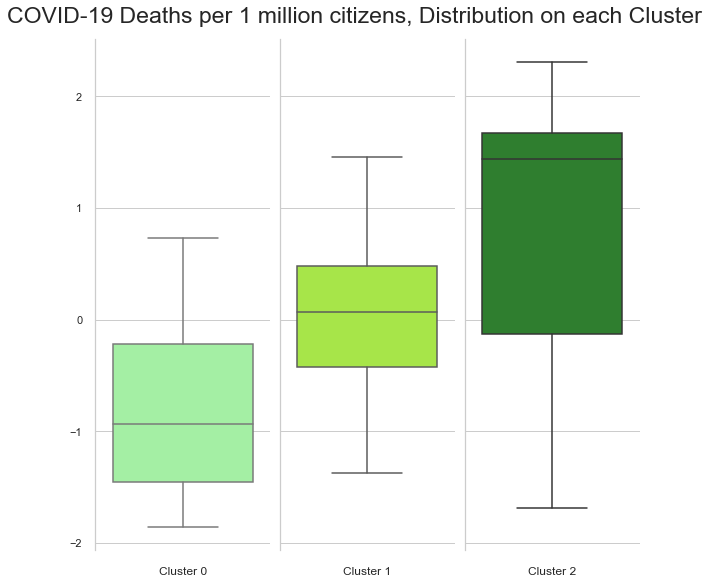

In [60]:
sns.set(style='whitegrid')

# Define the 3 dataframes
indep_vars_kmeans_final_0 = indep_vars_kmeans_final.merge(dep_var, on='state')[['k_means_labels', 'deaths_1M_pop']][indep_vars_kmeans_final['k_means_labels']==0]
indep_vars_kmeans_final_1 = indep_vars_kmeans_final.merge(dep_var, on='state')[['k_means_labels', 'deaths_1M_pop']][indep_vars_kmeans_final['k_means_labels']==1]
indep_vars_kmeans_final_2 = indep_vars_kmeans_final.merge(dep_var, on='state')[['k_means_labels', 'deaths_1M_pop']][indep_vars_kmeans_final['k_means_labels']==2]

#Prepare figure layout
fig, axes = plt.subplots(1, 3, figsize=(8,8), sharey='row', constrained_layout=True)

# Box plot for Cluster 0
plot_data_0 = indep_vars_kmeans_final_0.reset_index().melt('state')
plot_features_0 = indep_vars_kmeans_final_0.reset_index().drop('state', 1).columns

sns.boxplot(y='value', data=plot_data_0.loc[plot_data_0['variable']=='deaths_1M_pop'], ax=axes[0], color='palegreen')
axes[0].set_xlabel('Cluster 0')
axes[0].set_ylabel('')

# Box plot for Cluster 1
plot_data_1 = indep_vars_kmeans_final_1.reset_index().melt('state')
plot_features_1 = indep_vars_kmeans_final_1.reset_index().drop('state', 1).columns

sns.boxplot(y='value', data=plot_data_1.loc[plot_data_1['variable']=='deaths_1M_pop'], ax=axes[1], color='greenyellow')
axes[1].set_xlabel('Cluster 1')
axes[1].set_ylabel('')

# Box plot for Cluster 2
plot_data_2 = indep_vars_kmeans_final_2.reset_index().melt('state')
plot_features_2 = indep_vars_kmeans_final_2.reset_index().drop('state', 1).columns

sns.boxplot(y='value', data=plot_data_2.loc[plot_data_2['variable']=='deaths_1M_pop'], ax=axes[2], color='forestgreen')
axes[2].set_xlabel('Cluster 2')
axes[2].set_ylabel('')

# Finalize the plot
plt.suptitle('COVID-19 Deaths per 1 million citizens, Distribution on each Cluster', fontsize=23)
sns.despine(bottom=True)

# # Save it as a png file
# plt.savefig('distribution_on_each_cluster.png')

plt.show()

We will now use **Shapiro-Wilk tests** to test for normality on the COVID-19 Deaths per 1 million citizens of each Cluster.

In [61]:
# Shapiro-Wilk tests for normality

# For Cluster 0
stat, p = shapiro(indep_vars_kmeans_final_0['deaths_1M_pop'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Data is normally distributed on Cluster 0 (fail to reject H0)')
else:
    print('Data is NOT normally distributed on Cluster 0 (reject H0)')

Statistics=0.936, p=0.410
Data is normally distributed on Cluster 0 (fail to reject H0)


In [62]:
# For Cluster 1
stat, p = shapiro(indep_vars_kmeans_final_1['deaths_1M_pop'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Data is normally distributed on Cluster 1 (fail to reject H0)')
else:
    print('Data is NOT normally distributed on Cluster 1 (reject H0)')

Statistics=0.967, p=0.515
Data is normally distributed on Cluster 1 (fail to reject H0)


In [63]:
# For Cluster 2
stat, p = shapiro(indep_vars_kmeans_final_2['deaths_1M_pop'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Data is normally distributed on Cluster 2 (fail to reject H0)')
else:
    print('Data is NOT normally distributed on Cluster 2 (reject H0)')

Statistics=0.907, p=0.295
Data is normally distributed on Cluster 2 (fail to reject H0)


According to the Shapiro-Wilk tests, there is statistical evidence that all samples have normally distributed data, so we can use the **One-way ANOVA test**, a parametric method that can be used to compare the means of our 3 samples/clusters.

This test has 3 important assumptions that must be satisfied in order for the associated p-value to be valid:
1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal (homoscedasticity).

The two first assumptions hold on this data. The third one, homoscedasticity, is not as strong, but the 3 samples do not have extremely different standard deviations either, so we'll perform the ANOVA test.

In [64]:
# One-way ANOVA test

# Compare samples
stat, p = f_oneway(indep_vars_kmeans_final_0['deaths_1M_pop'], 
                   indep_vars_kmeans_final_1['deaths_1M_pop'], 
                   indep_vars_kmeans_final_2['deaths_1M_pop'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Two or more clusters have the same (population) mean (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=8.510, p=0.001
Different distributions (reject H0)


According to the One-way ANOVA test, we can conclude there is a statistically significant (at 1, 5 and 10%) difference on the means of two or more clusters.

To understand which are those clusters, we'll use the **Welch's t-test**. This test is very similar to the Student's t-test, although it does not need the assumption of equal variance. This will test for a significant difference between the mean of two different clusters.

In [65]:
# Welch's t-test

# Compare samples of Cluster 0 and Cluster 1
stat, p = ttest_ind(indep_vars_kmeans_final_0['deaths_1M_pop'], 
                    indep_vars_kmeans_final_1['deaths_1M_pop'], 
                    equal_var = False)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('The independent samples have identical average (expected) values (fail to reject H0)')
else:
    print('The independent samples DO NOT have identical average (expected) values (reject H0)')

Statistics=-3.060, p=0.006
The independent samples DO NOT have identical average (expected) values (reject H0)


In [66]:
# Compare samples of Cluster 0 and Cluster 2
stat, p = ttest_ind(indep_vars_kmeans_final_0['deaths_1M_pop'], 
                    indep_vars_kmeans_final_2['deaths_1M_pop'], 
                    equal_var = False)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('The independent samples have identical average (expected) values (fail to reject H0)')
else:
    print('The independent samples DO NOT have identical average (expected) values (reject H0)')

Statistics=-3.095, p=0.009
The independent samples DO NOT have identical average (expected) values (reject H0)


In [67]:
# Compare samples of Cluster 1 and Cluster 2
stat, p = ttest_ind(indep_vars_kmeans_final_1['deaths_1M_pop'], 
                    indep_vars_kmeans_final_2['deaths_1M_pop'], 
                    equal_var = False)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('The independent samples have identical average (expected) values (fail to reject H0)')
else:
    print('The independent samples DO NOT have identical average (expected) values (reject H0)')

Statistics=-1.555, p=0.152
The independent samples have identical average (expected) values (fail to reject H0)


According to the 3 Welch’s t-tests, we can conclude there is a statistically significant (at α equal to 1, 5 and 10%) difference on the means of Cluster 0 with Clusters 1 and 2. There is no statistically significant difference on the means of Cluster 1 and Cluster 2.

## References

Deepro F. Pasha, Alex Lundeen, Dilruba Yeasmin, M. Fayzul K. Pasha, An analysis to identify the important variables for the spread of COVID-19 using numerical techniques and data science, Case Studies in Chemical and Environmental Engineering, Volume 3, 2021, 100067, ISSN 2666-0164, https://doi.org/10.1016/j.cscee.2020.100067

## Data Sources

- Worldometer (Available at: https://www.worldometers.info/coronavirus/country/us/)
- BBC (Available at: https://www.bbc.com/news/election/us2020/results)
- STC COVID-19 Dataset (Available at: https://github.com/stccenter/COVID-19-Data/tree/master/Socioeconomic%20Data)

*All data was gathered on January 19, 2021*

## Project's Repository

Available at: https://github.com/rfmmonteiro99/SfDS-Project-Final